## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [1]:
# you code here
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math
from collections import Counter,defaultdict
from icecream import ic
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def assuming_function(x):
    return 6.18*x+ 8 + random.randint(-3,3)

random_data = np.random.random((50,2))
X = random_data[:,0]
y = [assuming_function(x) for x in X]

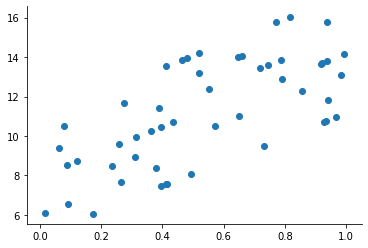

In [27]:
plt.scatter(X,y)
sns.despine()

In [29]:
lr = LinearRegression().fit(X.reshape(-1,1),y)

In [33]:
lr.score(X.reshape(-1,1),y)

0.46392031469739475

In [34]:
lr.coef_

array([6.25698886])

In [35]:
lr.intercept_

7.81825197741081

In [36]:
def fit_function(x):
    return lr.coef_*x + lr.intercept_

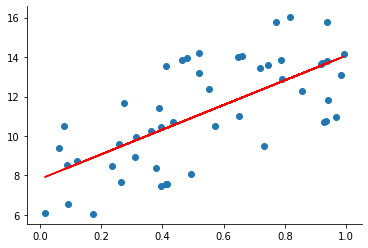

In [39]:
plt.scatter(X,y)
plt.plot(X,fit_function(X),color='r')
sns.despine()

In [76]:
new_data = 0.8

In [80]:
lr.predict([[new_data]])

array([12.82384306])

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [85]:
# you code here
from scipy.spatial.distance import cosine

def knn_model(X, y):
    
    return [(X_i,y_i) for X_i, y_i in zip(X,y)]

def cosine_distance(x1, x2):
    return cosine(x1, x2)

def knn_predict(model,x, k=5):
    most_similars = sorted(model,key=lambda x_i:cosine_distance(x_i[0],x))[:k]
    
    y_hats = [_y for x,_y in most_similars]
    
    print(most_similars)
    return np.mean(y_hats)

In [87]:
knn_predict(knn_model(X,y),0.8,)

[(0.8181319490861809, 16.056055445352598), (0.08947119760480227, 8.552932001197679), (0.4120540478374103, 13.546494015635195), (0.9268878345347222, 10.728166817424583), (0.41563378863022316, 7.56861681373478)]


11.290453018668966

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

$$ Entropy = - \sum^{n}_{i=1} Pr(x_i)log(Pr(x_i))$$

In [18]:
# you code here

def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [19]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
df_bought = pd.DataFrame(mock_data)

In [20]:
df_bought

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [21]:
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_spliter_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_spliter_2)
            
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [22]:
find_the_optimal_spilter(training_data=df_bought, target='bought')

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [0, 0, 1]
ic| p

spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565


('family_number', 2)

In [23]:
df_bought[df_bought['family_number'] == 2]

,gender,income,family_number,bought
2,F,+10,2,1
6,M,-10,2,1


In [24]:
df_bought[df_bought['family_number'] != 2]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [25]:
find_the_optimal_spilter(df_bought[df_bought['family_number'] != 2], 'bought')

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.5623351446188083
ic| sub_spliter_1: [1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 0.5623351446188083
ic| f: 'family_number'
ic| values: {1}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: []
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6365141682948128
ic| sub_spliter_1: [0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0]
ic| probs: [0.333333333333333

spliter is: ('income', '-10')
the min entropy is: 0.5623351446188083


('income', '-10')

In [26]:
fm_n_1 = df_bought[df_bought['family_number'] != 2]
fm_n_1[fm_n_1['income'] == '-10']

,gender,income,family_number,bought
1,F,-10,1,1


In [28]:
fm_n_1[fm_n_1['income'] != '-10']

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [45]:
find_the_optimal_spilter(fm_n_1.loc[fm_n_1['income'] != '-10',['gender','bought']], 'bought')

ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 0]
ic| probs: [0.5, 0.5]
ic| entropy_1: 0.6931471805599453
ic| sub_spliter_2: [0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6931471805599453
ic| sub_spliter_1: [0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 0]
ic| probs: [0.5, 0.5]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 0.6931471805599453


spliter is: ('gender', 'M')
the min entropy is: 0.6931471805599453


('gender', 'M')

In [49]:
fm_n_2 = fm_n_1.loc[fm_n_1['income'] != '-10',['gender','bought']]
fm_n_2

,gender,bought
0,F,1
3,F,0
4,M,0
5,M,0


#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [2]:
from sklearn.cluster import KMeans

In [21]:
X1 = [random.randint(0, 150) for _ in range(100)]
X2 = [random.randint(0, 150) for _ in range(100)]

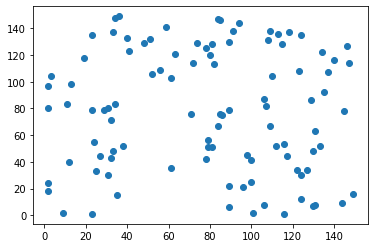

In [22]:
plt.scatter(X1, X2)

In [23]:
tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]

In [24]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [25]:
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
cluster.cluster_centers_

array([[ 18.09090909,  88.36363636],
       [ 94.76470588,  62.52941176],
       [ 62.79166667, 129.16666667],
       [118.22222222,  21.05555556],
       [ 25.28571429,  31.42857143],
       [127.0625    , 116.1875    ]])

In [27]:
cluster.labels_

array([4, 3, 3, 2, 3, 2, 0, 0, 5, 1, 5, 2, 5, 2, 2, 1, 0, 1, 0, 5, 0, 0,
       1, 3, 1, 2, 4, 0, 4, 2, 3, 2, 1, 3, 3, 5, 5, 4, 1, 2, 0, 3, 5, 2,
       1, 3, 4, 4, 5, 1, 2, 2, 1, 2, 4, 3, 3, 2, 2, 2, 2, 3, 2, 3, 4, 1,
       1, 4, 4, 1, 0, 2, 5, 5, 5, 3, 4, 1, 2, 3, 0, 5, 3, 2, 2, 5, 2, 1,
       3, 5, 1, 4, 5, 4, 3, 2, 5, 0, 1, 4])

In [28]:
centers = defaultdict(list)
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)

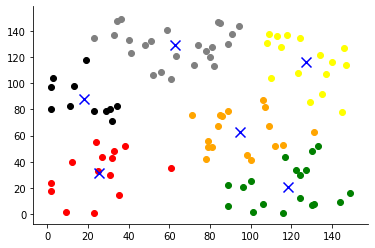

In [29]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100,marker='x',c='b')
sns.despine()

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans: 模型是对事物的合理简化而抽象出来的物件，因为影响模型的因素非常多，所以模型很可能都是错的，但是在特定的条件下的模型是对的是有用的。

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:

过拟合：算法所训练的模型过多地表达了数据之间的噪音关系，模型泛化能力过强，存在较大的方差

过拟合产生的原因：
* 样本量过少
* 样本噪音过大
* 模型过于复杂


欠拟合：算法所训练的模型不能很好地表达了数据之间的关系，模型泛化能力过弱，存在较大的偏差

欠过拟合产生的原因：
* 特征过少
* 样本噪音过大
* 模型复杂度过低

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans: 

precision 是指预测为“是”并且预测正确的个数/预测为“是”的个数
$$ precision = \frac{TP}{TP + NP} $$

recall 是指预测为“是”并且预测正确的个数/实际上为“是”的个数
$$ precision = \frac{TP}{TP + FN} $$

ROC/AUC ROC: receiver oprating characteristic curve 由TPR和FPR组成的曲线

AUC: area under curve ROC曲线下的面积，ROC越大表现越好
$$TPR = \frac{TP}{TP + FN} $$
$$FPR = \frac{FP}{FP + TN} $$

F1、F2 由于precision和recall是此消彼长的，我们有时候需要平衡这两个标准，于是引入了F-score
$$ F-score = (1+\beta^2)\cdot \frac{precision \cdot recall}{\beta^2 \cdot precision + recall} $$

$$ \beta = 1 时为F1，\beta = 2 时为F2 $$

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:传统的分析式编程的思维是：通过条件判断来得出最终的结果

机器学习的思维是：通过输入数据，让模型来学习数据中存在的某种模式，来计算出最终得出结果

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

Ans: 这句话正确，因为机器学习模型的评价标准其实有很多，但是并不都适合于我们所输入的数据或者我们想要达到的目标，所以正确定义了一个可以衡量我们的目标的评价标准就已经解决了一半

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [190]:
# you code here

def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
#     ic(probs)
    return - sum(p * np.log(p) for p in probs)

def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
#         ic(f)
        values = set(training_data[f])
#         ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
#             ic(sub_spliter_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
#             ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
#             ic(sub_spliter_2)
            
            entropy_2 = entropy(sub_spliter_2)
#             ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
#             ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
#     print('spliter is: {}'.format(spliter))
#     print('the min entropy is: {}'.format(min_entropy))
    
    return spliter


def get_spilt(training_data,target,feature,threshold):
    a = (training_data[feature]==threshold)
    return training_data[a].drop(columns=feature)

    
def decision_tree_model(training_data: pd.DataFrame, target: str):
    lst_target_value = training_data[target].value_counts()
#     ic(lst_target_value)
    if lst_target_value.iloc[0] == training_data[target].shape[0]:
        return 1
    if len(training_data.columns.tolist())==1:
        return lst_target_value.loc[1]/training_data[target].shape[0]
#     lst_feature = set(training_data.columns.tolist()) - {target}

    best_f,best_t= find_the_optimal_spilter(training_data,target)
    my_tree = {best_f:{}}
#     ic(best_f)
    for v_i in training_data[best_f].unique():
#         ic(v_i)
        subtree= get_spilt(training_data,target,best_f,v_i)
        my_tree[best_f][v_i] = decision_tree_model(subtree,target)
    return my_tree


def get_predict(model_tree,test_data):
#     output = test_data.copy()
    first_str = list(model_tree.keys())[0]
    second_dic = model_tree[first_str]

    v_i = test_data[first_str]
#     ic(v_i)
    for key_i in second_dic.keys():
#         ic(key_i)
        if v_i == key_i:
            if isinstance(second_dic[v_i],dict):
                pred = get_predict(second_dic[v_i],test_data)
            else:
                pred = second_dic[v_i]
    return pred

def decision_tree_predict(model_tree,test_data):
    output = test_data.copy()
    for index_i,row_i in output.iterrows():
        pred = get_predict(model_tree,output.loc[index_i,:])
        output.loc[index_i,'prediction'] = pred
        
    return output

In [120]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
df_bought = pd.DataFrame(mock_data)

In [121]:
df_bought

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [140]:
dt_model = decision_tree_model(df_bought,'bought')

In [193]:
df_bought_test = pd.DataFrame({"gender":['M','F','F'],
                               "income":['+10','-10','+10'],
                               "family_number":[1,2,1]}) 
df_bought_test

,gender,income,family_number
0,M,+10,1
1,F,-10,2
2,F,+10,1


In [194]:
df_bought_test.loc[0,:]['gender']

'M'

In [195]:
decision_tree_predict(dt_model,df_bought_test)

,gender,income,family_number,prediction
0,M,+10,1,1.0
1,F,-10,2,1.0
2,F,+10,1,0.5


<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

#### load data

In [51]:
# you code here
from sklearn.datasets import load_boston
import random
dataset = load_boston()
x,y=dataset['data'],dataset['target']
X_rm = x[:,5]

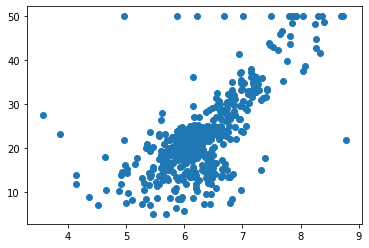

In [52]:
plt.scatter(X_rm,y)

#### assume that the target function is a linear function
$$ y = k * rm + b $$

In [53]:
def price(rm, k, b):
    return k * rm + b

#### define mean absolute loss

$$ (previous) MSE:loss = \frac{1}{n} \sum^{n}_{i=1}{(y_i - \hat y_i)^2}$$ 
$$ (current) MAE:loss = \frac{1}{n} \sum^{n}_{i=1}{|y_i - \hat y_i|} = \frac{1}{n} \sum^{n}_{i=1}{|y_i - (kx_i + b_i)|}$$ 

In [54]:
def loss(y, y_hat):
    return sum(np.abs(y_i - y_hat_i)for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

#### define partial derivatives

$$ \frac{\partial loss}{\partial k} = - \frac{1}{n}\sum^{n}_{i=1}|x_i|$$
$$ \frac{\partial loss}{\partial b} = -1$$

In [59]:
def partial_derivative_k(x): 
    gradient = -np.mean(np.abs(list(x)))
    return gradient

def partial_derivative_b():
    return -1

In [60]:
partial_derivative_k(X_rm)

-6.284634387351779

In [61]:

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 1000 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm)
    b_gradient = partial_derivative_b()
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b
# 用mae并不总能收敛

Iteration 0, the loss is 184.44107461237155, parameters k is -37.96063793271662 and b is 76.6604622295003
Iteration 1, the loss is 184.40057798298903, parameters k is -37.95435329832927 and b is 76.6614622295003
Iteration 2, the loss is 184.36008135360615, parameters k is -37.948068663941925 and b is 76.6624622295003
Iteration 3, the loss is 184.31958472422355, parameters k is -37.941784029554576 and b is 76.66346222950031
Iteration 4, the loss is 184.27908809484092, parameters k is -37.93549939516723 and b is 76.66446222950032
Iteration 5, the loss is 184.23859146545803, parameters k is -37.92921476077988 and b is 76.66546222950032
Iteration 6, the loss is 184.19809483607557, parameters k is -37.92293012639253 and b is 76.66646222950033
Iteration 7, the loss is 184.15759820669294, parameters k is -37.91664549200518 and b is 76.66746222950033
Iteration 8, the loss is 184.1171015773103, parameters k is -37.91036085761783 and b is 76.66846222950034
Iteration 9, the loss is 184.0766049479

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)